In [1]:
# Import required libraries
#import pandas as pd
###from sklearn.datasets import load_iris
#from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis

In [2]:
import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd

In [3]:
import networkx as nx

In [4]:
#fly_nums = range(1556,1565) + range(1566, 1567)#,1545)
#fly_nums = range(1566, 1570)
#multi_fly_df = util.construct_multi_fly_df(fly_nums)
#df = multi_fly_df


fly_nums = range(1389,1402)#,1545)
multi_fly_df = util.construct_multi_fly_df(fly_nums)

Making dataframe for fly number 1389
Making dataframe for fly number 1390
Making dataframe for fly number 1391
Making dataframe for fly number 1392
Making dataframe for fly number 1393
Making dataframe for fly number 1394
Making dataframe for fly number 1395
Making dataframe for fly number 1396
Making dataframe for fly number 1397
Making dataframe for fly number 1398
Making dataframe for fly number 1399
Making dataframe for fly number 1400
Making dataframe for fly number 1401


In [5]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))


# double_filtered_df = multi_fly_df.loc[idx]
# print(double_filtered_df)

['t' 'stimulus' 'amp_diff' 'left_amp' 'right_amp' 'fly_num' 'wbf'
 'experimental_condition' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right']
['cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0'
 'ol_blocks, g_x=-12, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0'
 '

In [6]:
#print(filtered_df[key+'_right'])

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [7]:
turn_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0']
turn_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0']
WSA_increase = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0']
WSA_decrease = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0']

#yaw_left= multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#yaw_right= multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#pitch_up =  multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#pitch_down =  multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#roll_cw =  multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#roll_ccw =  multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
#ol_stripe_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_stripe, g_x=-70, g_y=0, b_x=0, b_y=0, ch=0']
#ol_stripe_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_stripe, g_x=70, g_y=0, b_x=0, b_y=0, ch=0']
#stripe_fix = multi_fly_df.loc[multi_fly_df['stimulus']== 'pretrial_stripe_fix']


In [9]:
#pitch_down_WS_decrease = pitch_down.loc[((pitch_down['experimental_condition']=='condition=test'))]

#pitch_up_WS_increase = pitch_up.loc[((pitch_up['experimental_condition']=='condition=test'))]

#roll_cw_right_increase = roll_cw.loc[((roll_cw['experimental_condition']=='condition=test'))]#

#roll_ccw_left_increase = roll_ccw.loc[((roll_ccw['experimental_condition']=='condition=test'))]

#yaw_right_right_increase = yaw_right.loc[((yaw_right['experimental_condition']=='condition=test'))]

#yaw_left_left_increase = yaw_left.loc[((yaw_left['experimental_condition']=='condition=test'))]

In [8]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
X, _ = load_digits(return_X_y=True)
transformer = FactorAnalysis(n_components=7, random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape
(1797, 7)


(1797, 7)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [10]:
def fit(self, X, feature_labels=None, estimator_params=None):
        """Fits an Sklearn FA model to X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.

        feature_labels : array-like, shape (n_features), optional
                         Labels for each of the features in X.

        estimator_params : dict, optional
                           The parameters to pass to Sklearn's FA estimators.


        Returns
        -------
        self
        """
        self._reset()
        if feature_labels is None:
            feature_labels = ["feature_{}".format(i) for i in range(X.shape[1])]   # feature labels being the muscles in this case? sorted_keys
        self.feature_labels_ = feature_labels
        self.model_ = SklearnFactorAnalysis()
        if estimator_params is not None:
            # Update Sklearn estimator params
            assert isinstance(estimator_params, dict)   ##make estimator params muscles dict?
            self.model_.set_params(**estimator_params)
        self.model_.fit(X)

        # Remove zero-valued components (n_components x n_features)
        components_mask = np.sum(self.model_.components_ != 0.0, axis=1) > 0.0
        self.components_ = self.model_.components_[components_mask]

        # Compute the % variance explained (with/without noise)
        c2 = np.sum(self.components_ ** 2, axis=1)
        self.total_variance_ = np.sum(c2)
        self.pvars_ = 100 * c2 / self.total_variance_
        self.pvars_noise_ = 100 * c2 / (self.total_variance_ +
                                        np.sum(self.model_.noise_variance_))
        return self 

In [11]:
select_df= pd.DataFrame()
select_df['left_amp'] = multi_fly_df['left_amp']
#select_df['right_amp'] = multi_fly_df['right_amp']
select_df['i1_left'] = multi_fly_df['i1_left']
#select_df['i1_right'] = multi_fly_df['i1_right']

In [13]:
#WSA_increase 
#left_turn
#right_turn
#WSA_decrease

WSA_decrease.columns.values

array(['t', 'stimulus', 'amp_diff', 'left_amp', 'right_amp', 'fly_num',
       'wbf', 'experimental_condition', 'pr_left', 'tpd_left', 'nm_left',
       'iii1_left', 'iii3_left', 'i2_left', 'hg2_left', 'hg3_left',
       'hg1_left', 'i1_left', 'bkg_left', 'b1_left', 'b2_left', 'b3_left',
       'iii24_left', 'hg4_left', 'pr_right', 'tpd_right', 'nm_right',
       'iii1_right', 'iii3_right', 'i2_right', 'hg2_right', 'hg3_right',
       'hg1_right', 'i1_right', 'bkg_right', 'b1_right', 'b2_right',
       'b3_right', 'iii24_right', 'hg4_right'], dtype=object)

In [14]:
cull_list = [('left', 'bkg'), ('right', 'bkg'),  #('left', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    WSA_decrease = WSA_decrease.drop([cull[1]+'_'+cull[0]], axis=1)

WSA_decrease = WSA_decrease.drop(['t'], axis = 1)
WSA_decrease = WSA_decrease.drop(['stimulus'], axis =1)
WSA_decrease = WSA_decrease.drop(['amp_diff'], axis= 1)
WSA_decrease = WSA_decrease.drop(['left_amp'], axis = 1) 
WSA_decrease = WSA_decrease.drop(['right_amp'], axis =1) 
WSA_decrease = WSA_decrease.drop(['fly_num'], axis =1) 
WSA_decrease = WSA_decrease.drop(['wbf'], axis =1)
WSA_decrease = WSA_decrease.drop(['experimental_condition'], axis=1)

In [15]:
type(WSA_decrease)
np.shape(WSA_decrease)

(35131, 22)

In [16]:
factor_WSA_dec = FactorAnalysis().fit(WSA_decrease)

In [17]:
col_names = WSA_decrease.columns.values

In [18]:
d = pd.DataFrame(factor_WSA_dec.components_,columns = col_names)
d

,iii1_left,iii3_left,i2_left,hg2_left,hg3_left,hg1_left,i1_left,b1_left,b2_left,b3_left,...,iii3_right,i2_right,hg2_right,hg3_right,hg1_right,i1_right,b1_right,b2_right,b3_right,hg4_right
0,0.100788,1.120834,0.152857,2.583887,-0.027102,0.882052,0.308967,0.916307,0.051300,1.277731,...,1.107131,0.162772,1.117680,0.024151,1.031624,0.281901,1.092976,0.106729,1.559622,0.643431
1,0.008218,-0.242768,-0.063883,-0.369270,-0.015220,-0.191407,-0.005934,-0.128703,-0.004005,-0.197874,...,0.342489,0.016623,3.397827,0.111238,0.176696,0.075606,-0.432748,-0.044481,-0.033201,-0.234501
2,0.036578,-0.040991,0.008423,1.209432,-0.046334,0.462770,0.101228,-0.187481,-0.042281,-0.166136,...,-0.574207,0.021106,-0.058965,-0.080225,0.035877,-0.000675,-0.296001,-0.010312,-0.466946,-0.748789
3,-0.003302,0.236934,0.035494,0.082577,-0.020737,-0.190450,-0.134505,-0.055601,0.018367,-0.313437,...,-0.866569,0.138145,0.021320,0.023457,0.698271,0.164481,0.031967,-0.008613,0.189341,0.467397
4,-0.001248,-0.409040,0.248298,-0.219419,-0.016724,0.275828,0.124021,-0.171453,-0.020320,-0.013857,...,0.140632,0.105970,-0.034263,-0.001255,0.432493,0.046275,0.026259,0.011271,-0.264506,0.340631
5,0.032121,0.054876,-0.122115,-0.261667,0.026877,-0.042436,0.038601,0.009550,-0.026836,0.026685,...,-0.225745,-0.058262,-0.097085,0.000289,0.064292,0.103337,0.016478,0.005143,0.013450,-0.180420
6,0.001841,0.020772,0.013857,-0.210313,-0.008051,-0.029317,-0.039879,-0.001975,-0.007326,0.033478,...,0.076380,0.067787,0.043778,-0.110306,0.204194,-0.029202,0.001628,0.039439,0.094585,-0.283546
7,0.016790,-0.087152,-0.005543,-0.034174,0.001486,0.029901,0.004489,0.011944,0.051335,-0.090084,...,0.028777,-0.036527,-0.039258,0.019050,0.055613,-0.004784,0.014733,0.038367,-0.097340,0.005389
8,0.002729,0.087121,-0.026882,-0.012044,-0.017382,0.024524,-0.007831,-0.087320,-0.000298,-0.083510,...,0.113577,0.031831,-0.066195,0.021316,-0.083300,-0.005434,-0.021663,0.006002,0.123345,-0.005125
9,0.001775,0.013018,0.012370,0.021986,0.003853,-0.022548,-0.005802,-0.004142,-0.000367,0.003341,...,0.013439,0.004293,-0.004127,-0.000869,-0.003550,-0.001377,-0.017080,0.001460,-0.010641,0.012397


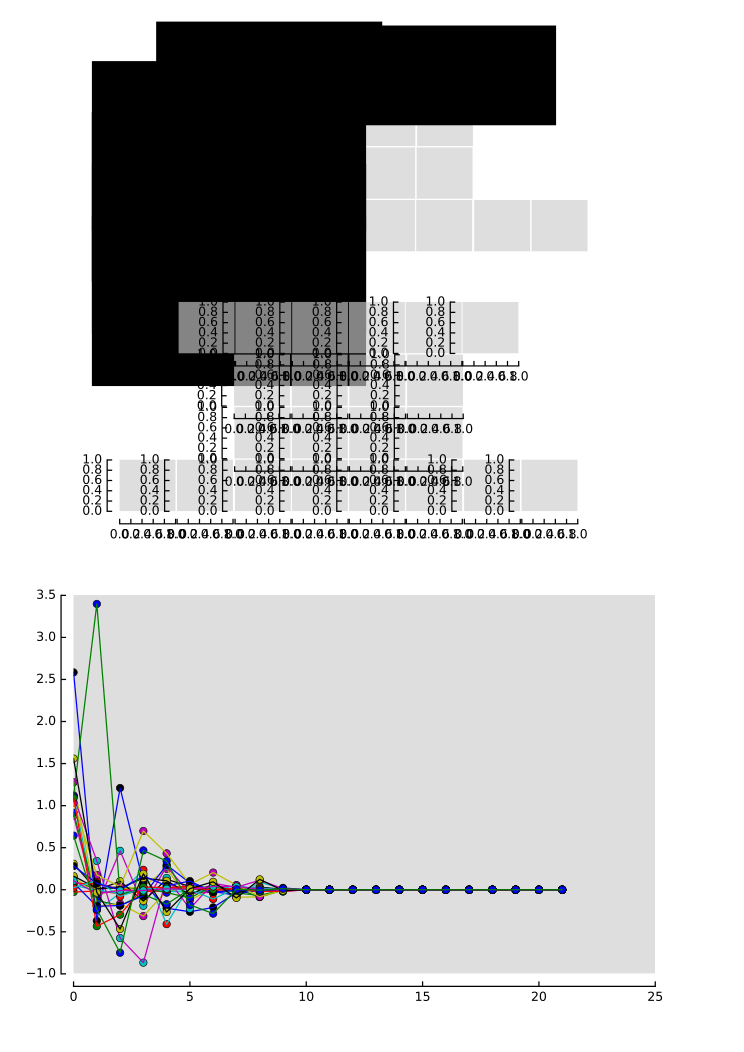

In [19]:
layout = fifi.FigureLayout('activity_heatmap_layout.svg',make_mplfigures = True)

#layout.axes['ind_cell_A_ts_1'].plot(times[1500:1600]-times[1500],cell_A_ind_F_1[1500:1600])
#layout.axes['ind_cell_B_ts_1'].plot(times[1500:1600]-times[1500],cell_B_ind_F_1[1500:1600])

#layout.axes['coup_cell_A_ts_1'].plot(times[1500:1600]-times[1500],cell_A_coup_F_1[1500:1600]#)
#layout.axes['coup_cell_B_ts_1'].plot(times[1500:1600]-times[1500],cell_B_coup_F_1[1500:1600])


for col in col_names: 
    layout.axes['heat_map'].plot(d[col], 'o')
    layout.axes['heat_map'].plot(d[col])
#norm=LogNorm(vmin=Z.min(), vmax=Z.max()), cmap='PuBu_r')
#fig.colorbar(c, ax=ax0)



#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)
#color=cmap(norm(full_matrix_2))
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])  # only needed for matplotlib < 3.1
#fig.colorbar(sm)

fifi.mpl_functions.set_spines(layout)
layout.save('factor_analysis_WSA_dec.svg')
plt.close('all')
display(SVG('factor_analysis_WSA_dec.svg'))

In [22]:

#from factor_analyzer import FactorAnalyzer

def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

#fa = FactorAnalyzer()
#fa.analyze(d, 6, rotation="varimax")

v = varimax(d)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars


In [21]:

## turn this into promax rotation
### keep track on the factors in rotation 


def promax (Phi, gamma =1, q= 6, tol = 1e -6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape


def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

#fa = FactorAnalyzer()
#fa.analyze(d, 6, rotation="varimax")

v = varimax(d)

SyntaxError: invalid syntax (<ipython-input-21-5881761f4cde>, line 6)

In [23]:
v

array([[  1.92987987e-16,   3.60822483e-16,  -4.09394740e-16,
          4.35900842e+00,   3.12250226e-16,  -1.33485367e-09,
          1.24900090e-16,   3.29172245e-07,   2.63677968e-16,
         -6.35126518e-05,   3.74617188e-06,   1.31838984e-16,
         -1.98111074e-03,  -2.63677968e-16,   1.59498230e-01,
          1.14491749e-16,  -9.15108397e-04,   1.00613962e-16,
          4.16333634e-17,   3.43475248e-16,  -3.79541460e-05,
         -1.27048928e-02],
       [ -1.09179159e-16,   8.50014503e-17,  -1.00267017e-15,
          3.12281325e-01,   1.57859836e-16,   4.43650013e-09,
          2.63677968e-16,   1.26683574e-05,  -1.45716772e-16,
         -5.54892489e-05,   1.09909896e-06,   1.90819582e-16,
          3.14138003e-03,   1.38777878e-17,   3.49213816e+00,
         -1.97758476e-16,   1.96360835e-04,   5.20417043e-18,
          4.16333634e-16,   1.44849410e-16,   1.74043590e-04,
          1.82326006e-02],
       [ -7.37257477e-17,  -4.09394740e-16,  -7.07767178e-16,
          2.1313

In [24]:
m = d #fa.components_
n = v #fa.noise_variance_

m1 = m**2

m2 = np.sum(m1,axis=1)

pvar1 = (100*m2[0])/np.sum(m2)
pvar2 = (100*m2[1])/np.sum(m2)
pvar3 = (100*m2[2])/np.sum(m2)
pvar4 = (100*m2[3])/np.sum(m2)
pvar5 = (100*m2[4])/np.sum(m2)
pvar6 = (100*m2[5])/np.sum(m2)
pvar7 = (100*m2[6])/np.sum(m2)
pvar8 = (100*m2[7])/np.sum(m2)
pvar9 = (100*m2[8])/np.sum(m2)
pvar10 = (100*m2[9])/np.sum(m2)
pvar11 = (100*m2[10])/np.sum(m2)
pvar12 = (100*m2[11])/np.sum(m2)
pvar13 = (100*m2[12])/np.sum(m2)
pvar14 = (100*m2[13])/np.sum(m2)
pvar15 = (100*m2[14])/np.sum(m2)
pvar16 = (100*m2[15])/np.sum(m2)
pvar17 = (100*m2[16])/np.sum(m2)
pvar18 = (100*m2[17])/np.sum(m2)
pvar19 = (100*m2[18])/np.sum(m2)
pvar20 = (100*m2[19])/np.sum(m2)
pvar21 = (100*m2[20])/np.sum(m2)
pvar22 = (100*m2[21])/np.sum(m2)


pvar1_with_noise = (100*m2[0])/(np.sum(m2)+np.sum(n))
pvar2_with_noise = (100*m2[1])/(np.sum(m2)+np.sum(n))

per_dav_df = pd.DataFrame()
per_dav_df['pvars']= [pvar1 , pvar2, pvar3, pvar4, pvar5, pvar6, pvar7, pvar8, pvar9, pvar10, pvar11, pvar12, pvar13, pvar14, pvar15, pvar16, pvar17, pvar18, pvar19, pvar20, pvar21, pvar22]

In [25]:
pvar1

50.720101849559192

In [26]:
pvar2

32.769805492817717

In [27]:
pvar3 

7.9969830447909027

In [36]:
pvar4

4.7114017268861286

In [37]:
pvar5

2.3837489033605603

In [28]:
pvar6

0.56746639069113258

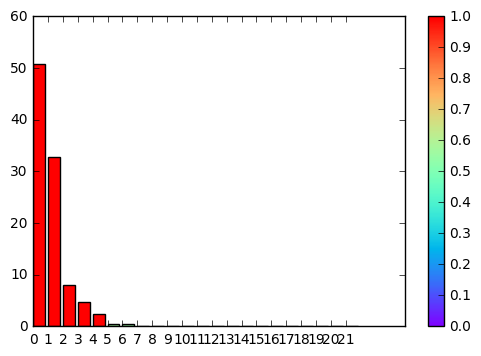

In [29]:
#Percentage of variance explained by each factor

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(22)
y = list(per_dav_df['pvars'])#*(10^160))
c = list(per_dav_df['pvars'])#*(10^160))
df = pd.DataFrame({"x":x,"y":y,"c":c})

cmap = plt.cm.rainbow
#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap((df.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap)#, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

In [40]:
cull_list = [('left', 'bkg'), ('right', 'bkg'),  #('left', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    WSA_increase = WSA_increase.drop([cull[1]+'_'+cull[0]], axis=1)

WSA_increase = WSA_increase.drop(['t'], axis = 1)
WSA_increase = WSA_increase.drop(['stimulus'], axis =1)
WSA_increase = WSA_increase.drop(['amp_diff'], axis= 1)
WSA_increase = WSA_increase.drop(['left_amp'], axis = 1) 
WSA_increase = WSA_increase.drop(['right_amp'], axis =1) 
WSA_increase = WSA_increase.drop(['fly_num'], axis =1) 
WSA_increase = WSA_increase.drop(['wbf'], axis =1)
WSA_increase = WSA_increase.drop(['experimental_condition'], axis=1)


type(WSA_increase)
np.shape(WSA_increase)


factor_WSA_inc = FactorAnalysis().fit(WSA_increase)

In [ ]:
othrogonal
vs 
oblique
vs
varimax rotations

normalization of matrices and correlations

all rotations to extract relevant features


In [ ]:
add oblique